In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

In [2]:
data = {
    'Weight': ['2', '4', '5', '3', '6', '5', '7'],
    'Price': ['3', '5', '60', '20', '50', '50', '55']
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df.to_csv("dataset.csv", index=False)

In [5]:
df = pd.read_csv("dataset.csv")

In [6]:
df

,Weight,Price
0,2,3
1,4,5
2,5,60
3,3,20
4,6,50
5,5,50
6,7,55


### Least squeare

In [11]:
x = df['Weight']

In [12]:
x

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: Weight, dtype: int64

In [13]:
y = df['Price']

In [14]:
y

0     3
1     5
2    60
3    20
4    50
5    50
6    55
Name: Price, dtype: int64

In [15]:
mean_x = np.mean(x)

In [16]:
mean_x

4.571428571428571

In [17]:
mean_y = np.mean(y)

In [18]:
mean_y

34.714285714285715

In [19]:
dev_x = x - mean_x
dev_y = y - mean_y

In [20]:
dev_x

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: Weight, dtype: float64

In [21]:
dev_y

0   -31.714286
1   -29.714286
2    25.285714
3   -14.714286
4    15.285714
5    15.285714
6    20.285714
Name: Price, dtype: float64

### Equations

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄ 

In [22]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)

In [23]:
m

11.86290322580645

In [24]:
c = mean_y - m*mean_x

In [25]:
c

-19.516129032258057

In [26]:
print(f"Slop (m): {m}")
print(f"Intercept (c): {c}")

Slop (m): 11.86290322580645
Intercept (c): -19.516129032258057


In [27]:
new_x = float(input('Enter the new value: '))
pred1 = m*new_x + c
print('Predicted price is: {rent}'.format(rent=pred1))

Enter the new value: 7
Predicted price is: 63.524193548387096


### using algorithum

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [32]:
reg.fit(df[['Weight']], y)

LinearRegression()

In [33]:
reg.coef_

array([11.86290323])

In [34]:
reg.intercept_

-19.516129032258064

In [35]:
c

-19.516129032258057

In [39]:
reg.predict([[7]])

C:\Users\Anik\anaconda3\envs\MLenv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.52419355])

Text(0.5, 1.0, 'weight-price view')

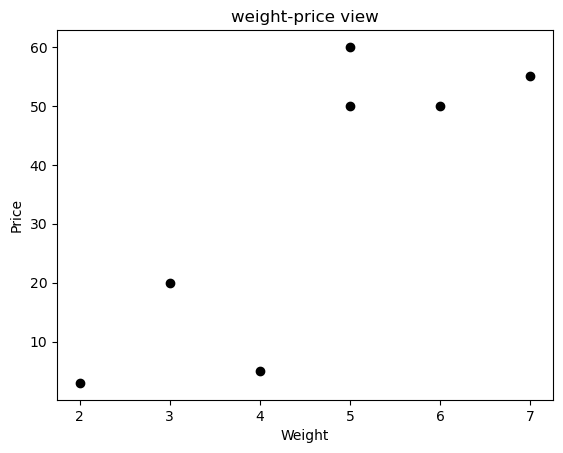

In [40]:
plt.scatter(x, y, color = 'black')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('weight-price view')

In [47]:
from sklearn.model_selection import train_test_split

In [51]:
x = df.drop('Price', axis = 1)
y = df[['Price']]

In [52]:
x

,Weight
0,2
1,4
2,5
3,3
4,6
5,5
6,7


In [53]:
y

,Price
0,3
1,5
2,60
3,20
4,50
5,50
6,55


In [56]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = .20)

In [57]:
xtrain

,Weight
1,4
0,2
5,5
6,7
2,5


In [58]:
xtest

,Weight
4,6
3,3


In [59]:
ytrain

,Price
1,5
0,3
5,50
6,55
2,60


In [60]:
ytest

,Price
4,50
3,20


In [61]:
xtest.shape

(2, 1)

In [62]:
xtrain.shape

(5, 1)

In [63]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [64]:
reg.predict(xtest)

array([[52.12121212],
       [14.57575758]])

In [65]:
ytest['predicted_y'] = reg.predict(xtest)

In [66]:
ytest

,Price,predicted_y
4,50,52.121212
3,20,14.575758


In [67]:
ytest.drop('predicted_y', axis=1, inplace=True)

In [68]:
ytest

,Price
4,50
3,20


In [69]:
reg.score(xtrain,ytrain)

0.6515514402820592

In [70]:
reg.score(xtest,ytest)

0.9246178961330478

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
mse = mean_squared_error(ytest, reg.predict(xtest))

In [74]:
mse

16.960973370064238

In [75]:
mean_absolute_error(ytest, reg.predict(xtest))

3.77272727272727

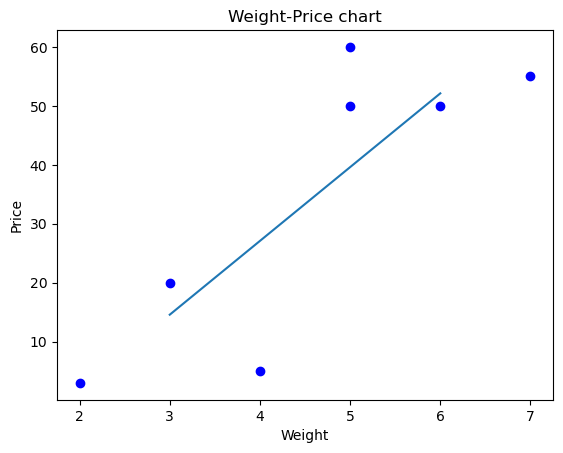

In [76]:
plt.scatter(x,y, color='blue')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title("Weight-Price chart")
plt.plot(xtest, reg.predict(xtest))

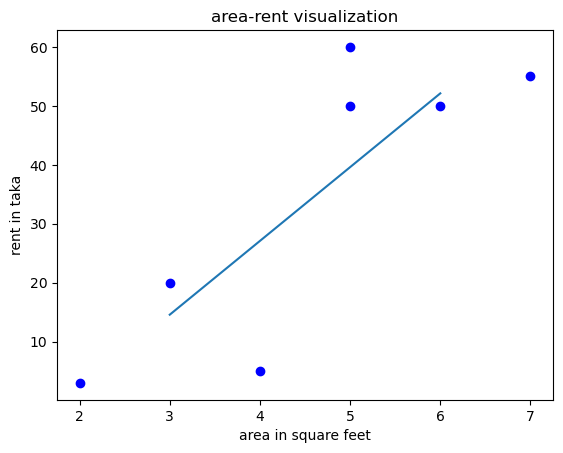

In [77]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest.squeeze(), reg.predict(xtest))